# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Sobreviventes do Titanic

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")
display(treino)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
display(treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [ ]:
treino_tratado=treino.drop(['Cabin','Embarked','Ticket','Name','Age'],axis=1)
teste_tratado=teste.drop(['Cabin','Embarked','Ticket','Name','Age'],axis=1)

In [ ]:
treino_tratado=treino_tratado.dropna()
teste_tratado=teste_tratado.dropna()

In [ ]:
treino_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [ ]:
print(treino_tratado.shape)
print(teste_tratado.shape)

(891, 7)
(417, 6)


In [ ]:
codificador = LabelEncoder()

In [ ]:
treino_tratado["Sex"] = codificador.fit_transform(treino_tratado["Sex"])

teste_tratado["Sex"] = codificador.fit_transform(teste_tratado["Sex"])

In [ ]:
treino_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [ ]:
treino_tratado.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200


<Axes: >

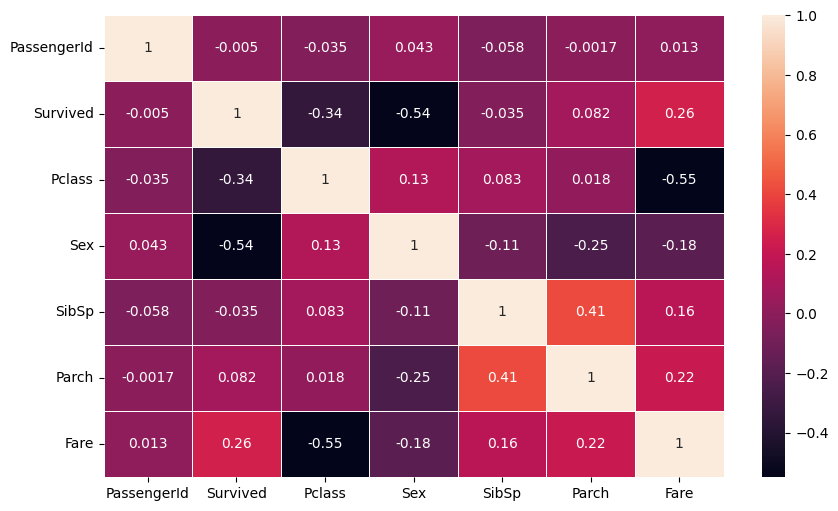

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(data = treino_tratado.corr(), annot = True, linewidth = 0.5)

In [ ]:
#x->dados
#y->gabarito
y = treino_tratado["Survived"]
x = treino_tratado.drop(columns=["Survived", "PassengerId"])

In [ ]:
#separa dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

In [ ]:
#cria IA
modelo_arvore_decisao = RandomForestClassifier()
modelo_KNN = KNeighborsClassifier()

In [ ]:
#treina IA
modelo_arvore_decisao.fit(x_treino,y_treino)
modelo_KNN.fit(x_treino,y_treino)

KNeighborsClassifier()

In [ ]:
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)
previsao_knn = modelo_KNN.predict(x_teste.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#acuracia pior
print('Árvore: ',accuracy_score(y_teste,previsao_arvore_decisao))

#acuracia melhor
print('KNN: ',accuracy_score(y_teste,previsao_knn))

Árvore:  0.7847533632286996
KNN:  0.7982062780269058


In [ ]:
#fazer as previsoes

previsoes = modelo_KNN.predict(teste_tratado.drop(['PassengerId'],axis=1))

In [ ]:
#df_prev_Surv = pd.DataFrame({'Survived':previsoes})

teste_tratado.insert(1,'Survived',previsoes)

In [ ]:
df_Solucao=teste_tratado[['PassengerId','Survived']]

In [ ]:
display(df_Solucao)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_Solucao.describe()

,PassengerId,Survived
count,417.000000,417.000000
mean,1100.635492,0.378897
std,120.923774,0.485695
min,892.000000,0.000000
25%,996.000000,0.000000
50%,1101.000000,0.000000
75%,1205.000000,1.000000
max,1309.000000,1.000000


In [ ]:
print(round(df_Solucao[teste_tratado['Sex']==0].describe()['Survived'][1],3)*100," porcento das mulheres sobreviveram")
print(round(df_Solucao[teste_tratado['Sex']==1].describe()['Survived'][1],3)*100," porcento dos homens sobreviveram")

73.7  porcento das mulheres sobreviveram
17.4  porcento dos homens sobreviveram


In [ ]:
teste_tratado

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,892,0,3,1,0,0,7.8292
1,893,0,3,0,1,0,7.0000
2,894,0,2,1,0,0,9.6875
3,895,0,3,1,0,0,8.6625
4,896,1,3,0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,0,3,1,0,0,8.0500
414,1306,1,1,0,0,0,108.9000
415,1307,0,3,1,0,0,7.2500
416,1308,0,3,1,0,0,8.0500


In [ ]:
print(round(df_Solucao[teste_tratado['Pclass']==1].describe()['Survived'][1],3)*100," porcento das pessoas de 1ª classe sobreviveram")
print(round(df_Solucao[teste_tratado['Pclass']==2].describe()['Survived'][1],3)*100," porcento das pessoas de 2ª classe sobreviveram")
print(round(df_Solucao[teste_tratado['Pclass']==3].describe()['Survived'][1],3)*100," porcento das pessoas de 3ª classe sobreviveram")

70.1  porcento das pessoas de 1ª classe sobreviveram
31.2  porcento das pessoas de 2ª classe sobreviveram
24.9  porcento das pessoas de 3ª classe sobreviveram
